In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [3]:
!ls

emails.csv  Untitled.ipynb


In [4]:
df=pd.read_csv('emails.csv',nrows=1000)

In [5]:
data=df['message']

In [6]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [7]:
vectorizer=TfidfVectorizer(stop_words='english')

In [8]:
text=vectorizer.fit_transform(data)

In [9]:
text=normalize(text).toarray()

In [10]:
text

array([[0.04226768, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01788586, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06791102, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07190196, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01973175, 0.19985238, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02437739, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
clusters=range(1,6)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in clusters]

In [23]:

score = [kmeans[i].fit(text).score(text) for i in range(len(kmeans))]

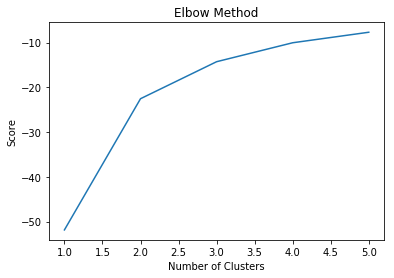

In [24]:
plt.plot(clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()


In [17]:
del score

In [18]:
import gc
gc.collect()

4777

In [25]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(text)

In [27]:
model=KMeans(n_clusters=2,max_iter=600)
fitted = model.fit(Y_sklearn)
predicted_values = model.predict(Y_sklearn)

In [30]:
centers=fitted.cluster_centers_

In [31]:
centers

array([[-0.07561323,  0.00549205],
       [ 0.38544303, -0.02799606]])

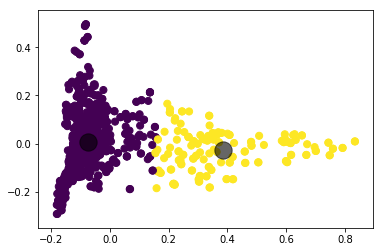

In [32]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)